# Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

# Data

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv("E:\CapStone\IoT_Intrusion.csv")
data.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,83343831.92,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,82926067.47,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,83127993.93,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,83015696.38,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,82972999.18,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


# EDA

In [7]:
data.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

In [8]:
data.dtypes

flow_duration      float64
Header_Length      float64
Protocol Type      float64
Duration           float64
Rate               float64
Srate              float64
Drate              float64
fin_flag_number      int64
syn_flag_number      int64
rst_flag_number      int64
psh_flag_number      int64
ack_flag_number      int64
ece_flag_number      int64
cwr_flag_number      int64
ack_count          float64
syn_count          float64
fin_count          float64
urg_count          float64
rst_count          float64
HTTP                 int64
HTTPS                int64
DNS                  int64
Telnet               int64
SMTP                 int64
SSH                  int64
IRC                  int64
TCP                  int64
UDP                  int64
DHCP                 int64
ARP                  int64
ICMP                 int64
IPv                  int64
LLC                  int64
Tot sum            float64
Min                float64
Max                float64
AVG                float64
S

In [9]:
data['label'].value_counts()

DDoS-ICMP_Flood            161281
DDoS-UDP_Flood             121205
DDoS-TCP_Flood             101293
DDoS-PSHACK_Flood           92395
DDoS-SYN_Flood              91644
DDoS-RSTFINFlood            90823
DDoS-SynonymousIP_Flood     80680
DoS-UDP_Flood               74787
DoS-TCP_Flood               59807
DoS-SYN_Flood               45207
BenignTraffic               24476
Mirai-greeth_flood          22115
Mirai-udpplain              20166
Mirai-greip_flood           16952
DDoS-ICMP_Fragmentation     10223
MITM-ArpSpoofing             7019
DDoS-ACK_Fragmentation       6431
DDoS-UDP_Fragmentation       6431
DNS_Spoofing                 4034
Recon-HostDiscovery          3007
Recon-OSScan                 2225
Recon-PortScan               1863
DoS-HTTP_Flood               1680
VulnerabilityScan             809
DDoS-HTTP_Flood               626
DDoS-SlowLoris                493
DictionaryBruteForce          324
BrowserHijacking              140
SqlInjection                  122
CommandInjecti

In [10]:
data.shape

(1048575, 47)

In [11]:
# a dictionary label_mapping to map the original attack labels to attack categories.
label_mapping = {
    'DDoS': ['DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
             'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood',
             'DDoS-ICMP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-UDP_Fragmentation',
             'DDoS-HTTP_Flood', 'DDoS-SlowLoris'],
    'DoS': ['DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood'],
    'Mirai': ['Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood'],
    
    'Benign': ['BenignTraffic'],
    'Other': ['Uploading_Attack',"Recon-HostDiscovery","Recon-OSScan","Recon-PortScan","Recon-PingSweep", 'VulnerabilityScan', 'Backdoor_Malware', 'BrowserHijacking', 'SqlInjection', 'CommandInjection', 'XSS']
}


In [12]:
# assigning the appropriate category label based on the 'label' column using the mapping defined

data['label_category'] = data['label'].apply(lambda x: next((key for key, values in label_mapping.items() if x in values), 'Other'))

# Filling NaN values in 'label_category' with 'Other' to handle any records that don't match the predefined labels.
data['label_category'] = data['label_category'].fillna('Other')

In [13]:
#Creating separate lists for flag columns, protocol columns, and count columns to process them individually

flag_columns = ['fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number',
                'ack_flag_number', 'ece_flag_number', 'cwr_flag_number']
protocol_columns = ['HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP',
                    'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC']
count_columns=[ 'ack_count', 'syn_count','fin_count', 'urg_count', 'rst_count']


# calculating the sum of flag counts, count columns, and protocol counts and adding them as new columns

data['sum_flags'] = data[flag_columns].sum(axis=1)
data.drop(flag_columns, axis=1, inplace=True)
data['sum_count'] = data[count_columns].sum(axis=1)
data.drop(count_columns, axis=1, inplace=True)
data['sum_protocols'] = data[protocol_columns].sum(axis=1)
data.drop(protocol_columns, axis=1, inplace=True)


In [14]:
# Calculating total label_counts for our attack categories

label_counts = data['label_category'].value_counts()
print(label_counts)

DDoS      763525
DoS       181481
Mirai      59233
Benign     24476
Other      19860
Name: label_category, dtype: int64


In [15]:
data = data.drop( "label", axis=1)

In [16]:
data.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,Tot sum,Min,Max,...,Number,Magnitue,Radius,Covariance,Variance,Weight,label_category,sum_flags,sum_count,sum_protocols
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,567.00,54.00,54.0,...,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS,2,2.00,3
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,581.33,54.00,66.3,...,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS,0,0.00,4
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,441.00,42.00,42.0,...,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS,0,0.00,3
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,525.00,50.00,50.0,...,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS,0,0.00,3
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,644.60,57.88,131.6,...,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS,1,1.07,3


In [17]:
data.isnull().sum()

flow_duration     0
Header_Length     0
Protocol Type     0
Duration          0
Rate              0
Srate             0
Drate             0
Tot sum           0
Min               0
Max               0
AVG               0
Std               0
Tot size          0
IAT               0
Number            0
Magnitue          0
Radius            0
Covariance        0
Variance          0
Weight            0
label_category    0
sum_flags         0
sum_count         0
sum_protocols     0
dtype: int64

No null values are present

In [18]:
# checking for duplicate values
duplicates = data.duplicated()


print(duplicates.sum())

# Drop the duplicates
data = data.drop_duplicates()

data.shape

65585


(982990, 24)

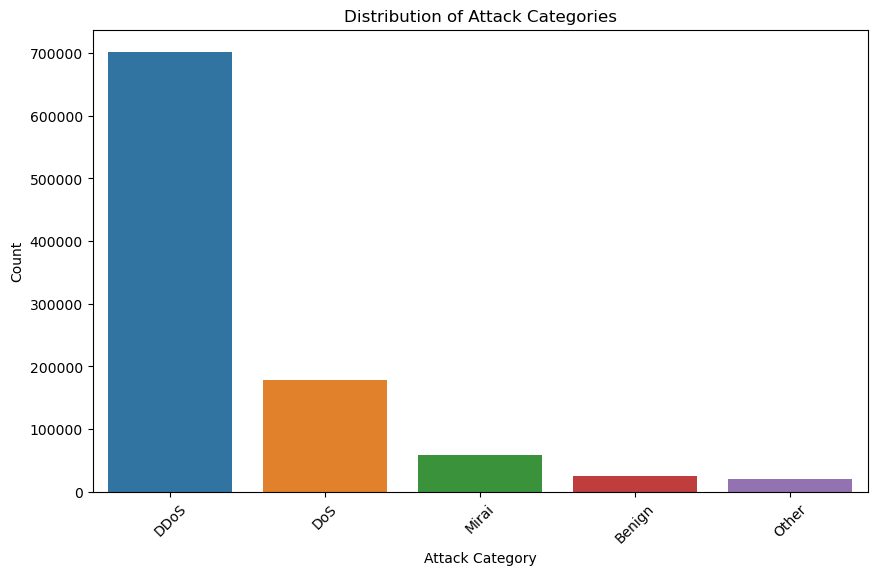

In [19]:
# Visualizing label counts
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='label_category', order=label_counts.index)
plt.xticks(rotation=45)
plt.title('Distribution of Attack Categories')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.show()


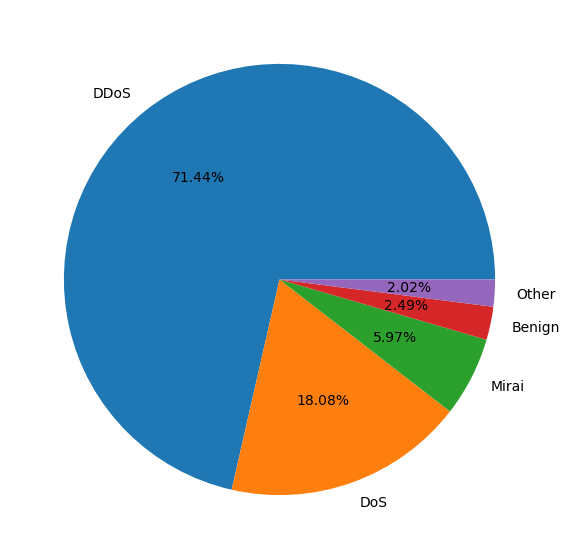

In [20]:
plt.figure(figsize=(13,7))
plt.pie(x=data['label_category'].value_counts(),labels=data['label_category'].value_counts().index,autopct='%.2f%%')
plt.show()

 Interpretation:
 
The bar graph shows the distribution of attack categories, with the height of each bar representing the number of attacks in that category. The following are some key observations from the plot:

- DDoS attacks are the most common type of attack, accounting for over 50% of all attacks.
- DOS attacks are the second most common type of attack, accounting for about 30% of all attacks.
- Mirai attacks are a specific type of DDoS attack that uses IoT devices to launch large-scale attacks.
- Benign traffic accounts for a significant portion of all traffic, but it is not considered to be an attack.
- Other types of attacks, such as reconnaissance and malware attacks, are less common.

# Visualization

### Univariate Analysis

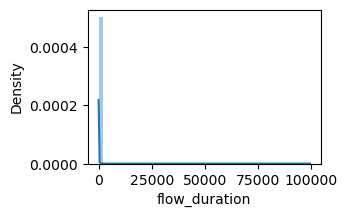

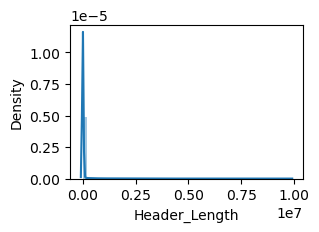

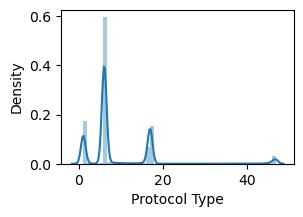

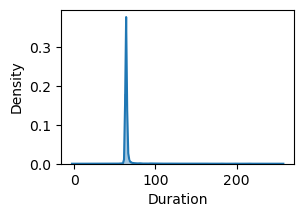

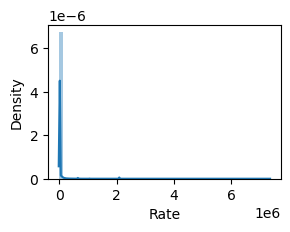

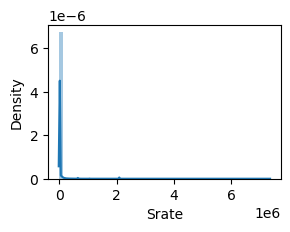

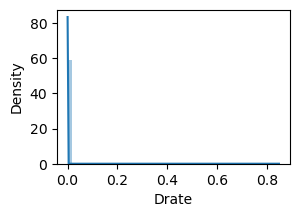

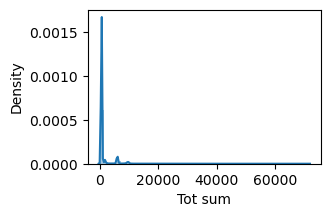

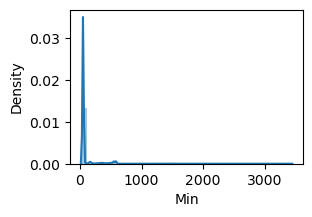

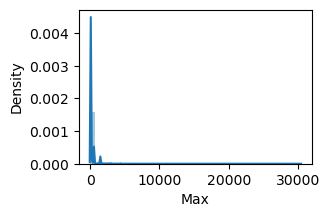

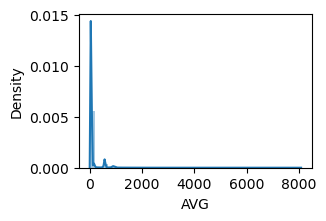

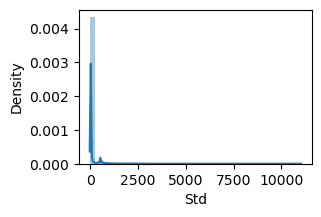

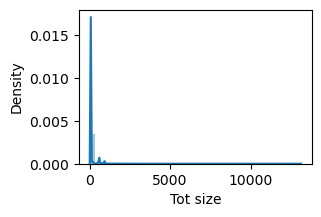

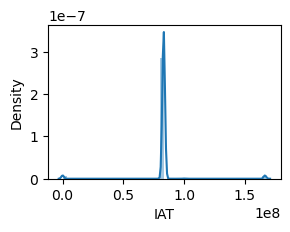

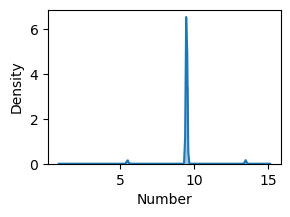

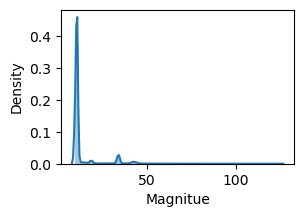

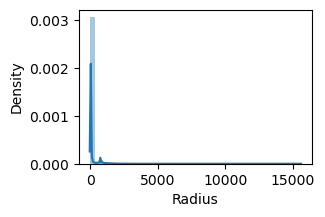

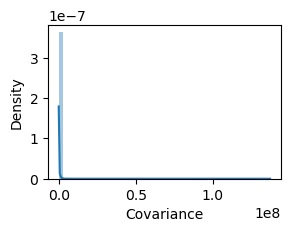

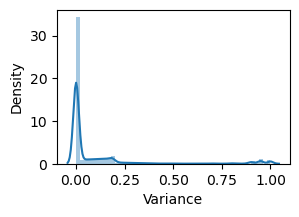

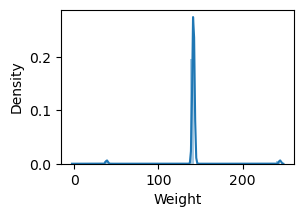

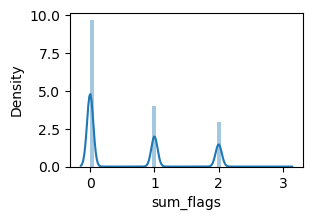

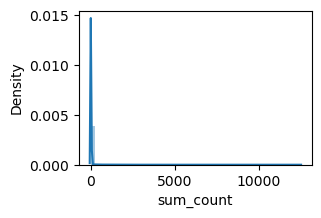

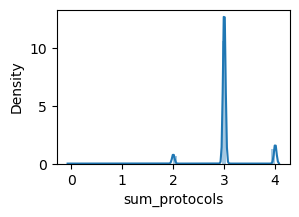

In [40]:
for i in data.drop('label_category',axis=1).columns:
    plt.figure(figsize=(3,2))
    sns.distplot(data[i])
    plt.show()

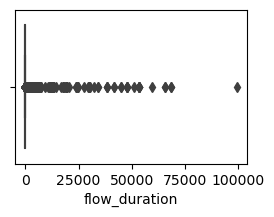

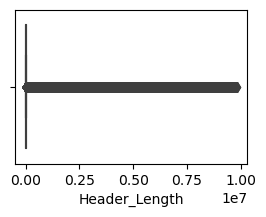

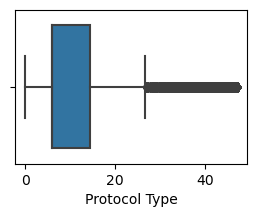

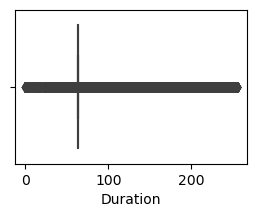

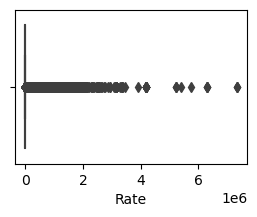

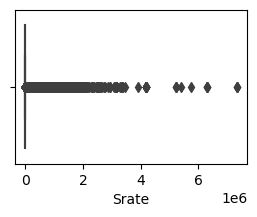

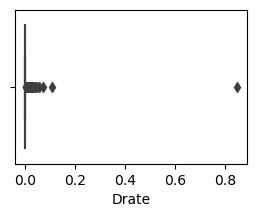

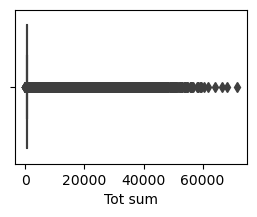

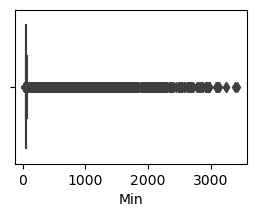

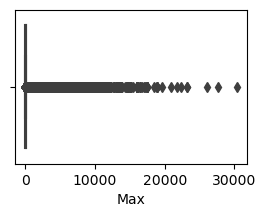

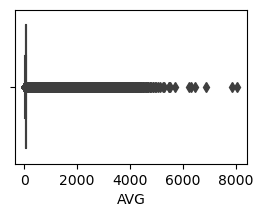

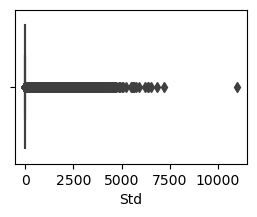

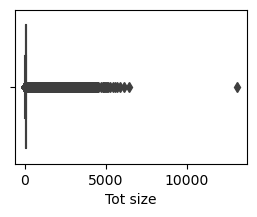

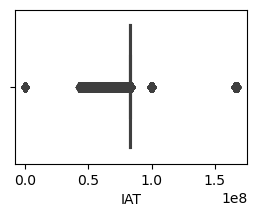

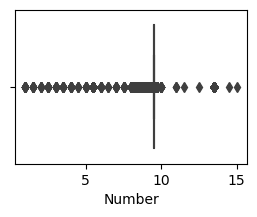

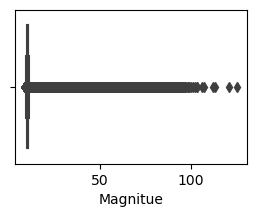

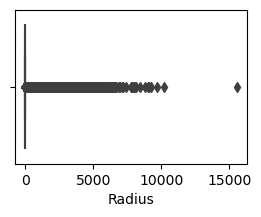

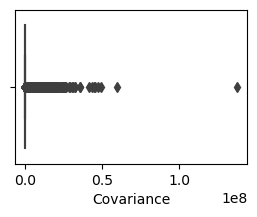

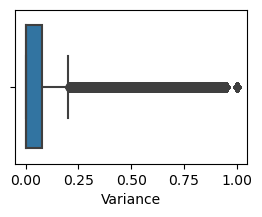

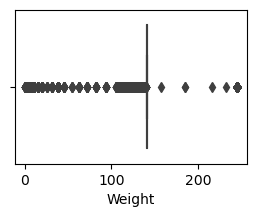

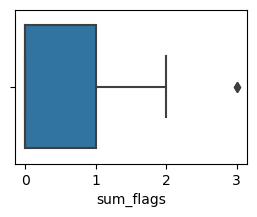

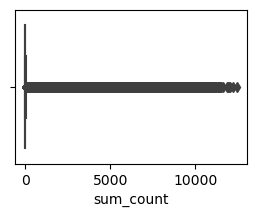

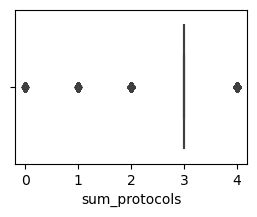

In [41]:
for i in data.drop('label_category',axis=1).columns:
    plt.figure(figsize=(3,2))
    sns.boxplot(x=data[i])
    plt.show()

### Bivariate Analysis

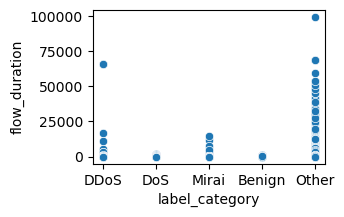

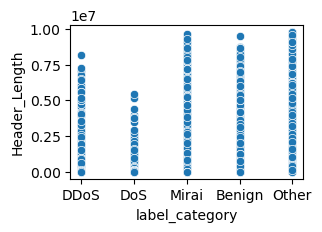

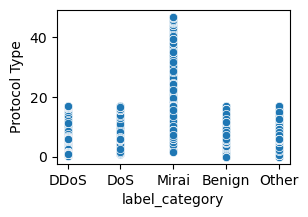

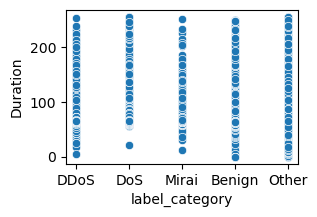

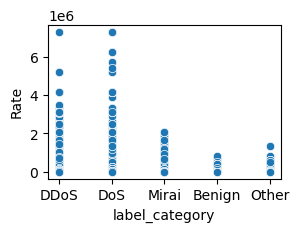

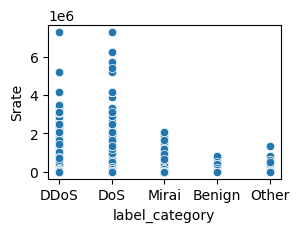

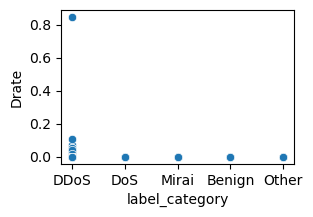

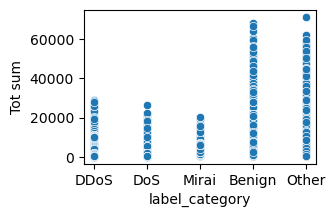

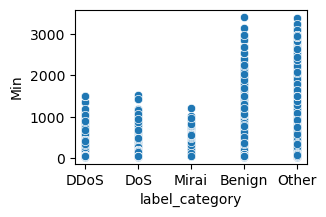

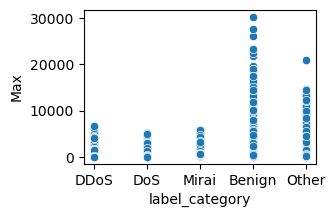

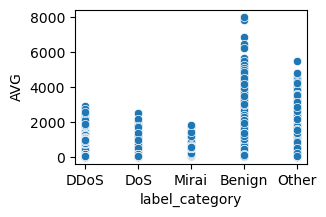

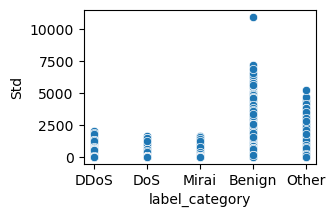

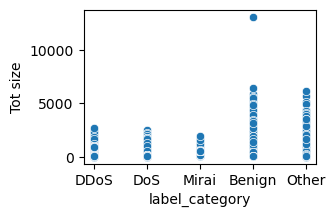

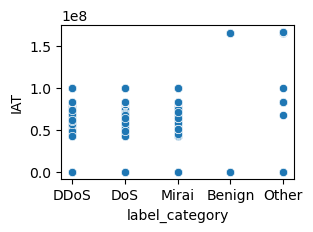

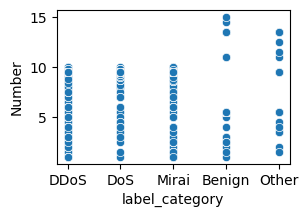

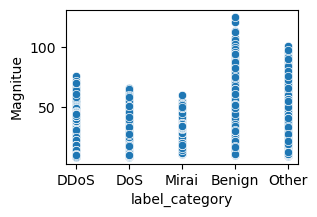

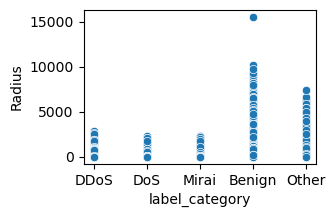

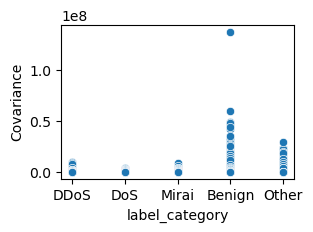

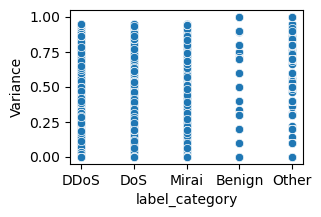

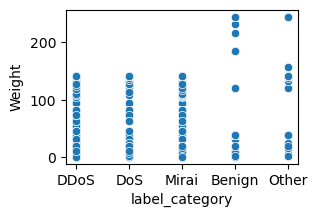

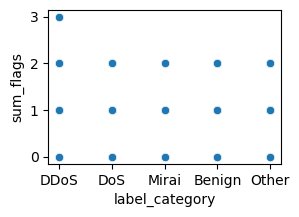

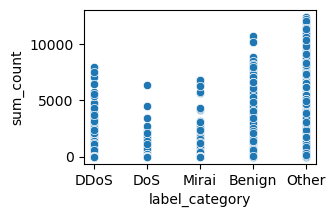

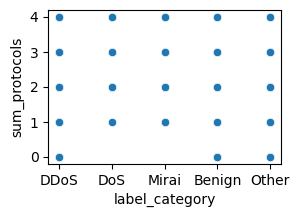

In [42]:
for i in data.drop('label_category',axis=1).columns:
    plt.figure(figsize=(3,2))
    sns.scatterplot(x=data['label_category'],y=data[i])
    plt.show()

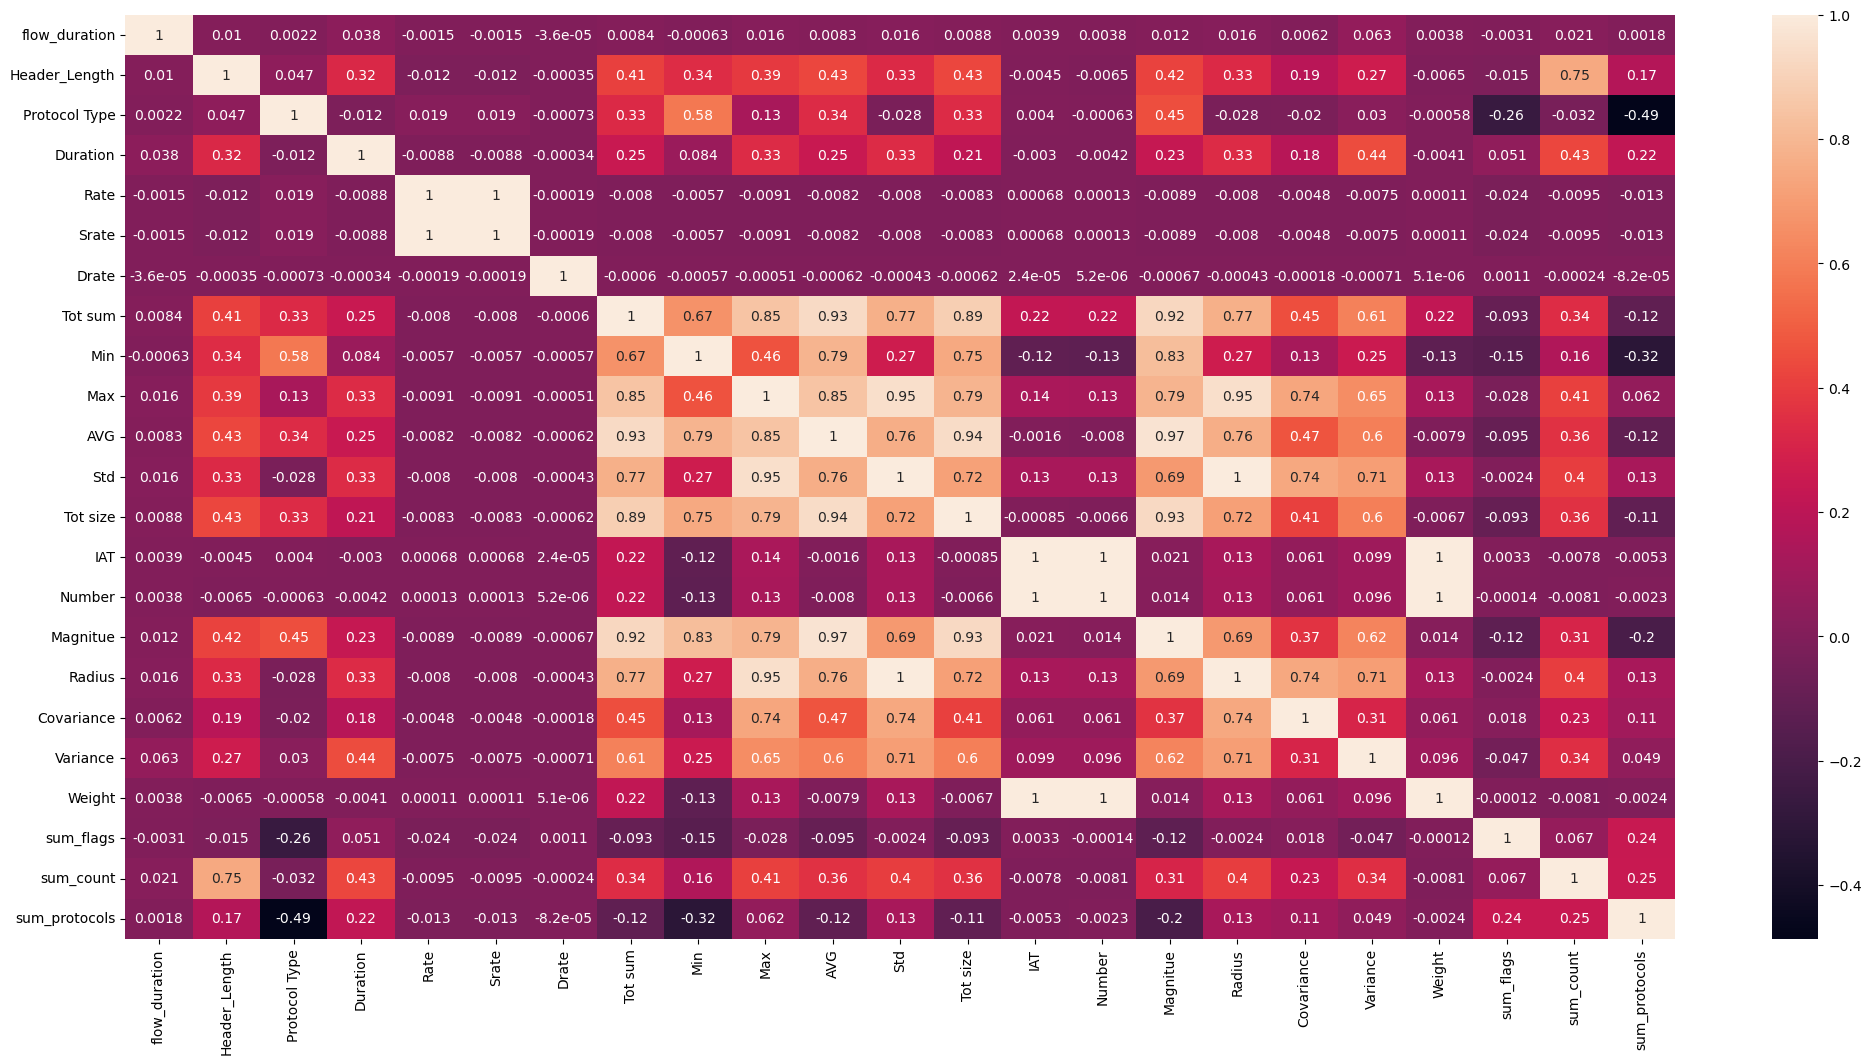

In [39]:
plt.figure(figsize=(25,12))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Multivariate Analysis

In [ ]:
sns.pairplot(data)

Interpretation:
The pairplots show the relationships between the following variables:

-rate and duration
-rate and header length
-header length and duration
-flow_duration and header_length
-flow_duration and le7


- The plot also shows that there is a negative correlation between flow_duration and header_length. This means that flows with a longer duration are more likely to have a shorter header length. 

- The plot shows that there is a positive correlation between flow_duration and le7. This means that flows with a longer duration are more likely to have a higher value for le7. 

- The plot shows that there is a positive correlation between rate and duration. This means that packets with a higher rate are more likely to have a longer duration. This is likely because packets with a higher rate are more likely to be part of a DDoS attack.

- The plot also shows that there is a negative correlation between rate and header length. This means that packets with a higher rate are more likely to have a shorter header length. This is likely because packets with a higher rate are more likely to be part of a DDoS attack, and DDoS attacks often use small packets to overwhelm the target system.

- The plot also shows that there is a positive correlation between header length and duration. This means that packets with a longer header length are more likely to have a longer duration. This is likely because packets with a longer header length are more likely to be complex and to take longer to process.


- Overall, the pairplots provide some insights into the relationships between the different variables. The positive correlation between rate and duration and the negative correlation between rate and header length suggest that rate is a useful variable for identifying DDoS attacks. The positive correlation between header length and duration suggests that header length may also be a useful variable for identifying DDoS attacks.


### Converting Target Variable Into Numerical

In [22]:
data['label_category'].unique()

array(['DDoS', 'DoS', 'Mirai', 'Benign', 'Other'], dtype=object)

In [23]:
# converting target to numerical for model building
data['label_category'] = data['label_category'].map({'DDoS':0, 'DoS':1, 'Mirai':2, 'Benign':3,
                                 'Other':4})

In [25]:
data['label_category'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [24]:
data.head(3)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,Tot sum,Min,Max,...,Number,Magnitue,Radius,Covariance,Variance,Weight,label_category,sum_flags,sum_count,sum_protocols
0,0.0,54.00,6.00,64.0,0.329807,0.329807,0.0,567.00,54.0,54.0,...,9.5,10.392305,0.000000,0.000000,0.00,141.55,0,2,2.0,3
1,0.0,57.04,6.33,64.0,4.290556,4.290556,0.0,581.33,54.0,66.3,...,9.5,10.464666,4.010353,160.987842,0.05,141.55,1,0,0.0,4
2,0.0,0.00,1.00,64.0,33.396799,33.396799,0.0,441.00,42.0,42.0,...,9.5,9.165151,0.000000,0.000000,0.00,141.55,0,0,0.0,3


In [49]:
import scipy.stats as stats

# Creating an empty DataFrame to store Kruskal-Wallis H-test results
kruskal_results = pd.DataFrame(columns=['Feature', 'H-Statistic', 'P-Value'])

# Performing Kruskal-Wallis H-test for each numerical feature
for feature in data.columns[:-2]:  # Excluding the last two columns 'label_category' and 'target_encoded'
    groups = [data[feature][data['label_category'] == category] for category in data['label_category'].unique()]
    h_statistic, p_value = stats.kruskal(*groups)
    kruskal_results = kruskal_results.append({'Feature': feature, 'H-Statistic': h_statistic, 'P-Value': p_value}, ignore_index=True)

# Sorting the results by p-value in ascending order
kruskal_results = kruskal_results.sort_values(by='P-Value')

# Displaying the results
print(kruskal_results)


           Feature    H-Statistic       P-Value
0    flow_duration  184956.498647  0.000000e+00
18        Variance  169038.777105  0.000000e+00
17      Covariance  170166.362010  0.000000e+00
16          Radius  173736.199740  0.000000e+00
15        Magnitue  275663.912137  0.000000e+00
13             IAT  485314.289771  0.000000e+00
12        Tot size  274541.680531  0.000000e+00
11             Std  172866.056197  0.000000e+00
20  label_category  982989.000000  0.000000e+00
10             AVG  274791.019109  0.000000e+00
8              Min  258939.544736  0.000000e+00
7          Tot sum  221301.215899  0.000000e+00
5            Srate   11944.931638  0.000000e+00
4             Rate   11944.931638  0.000000e+00
3         Duration   73022.217408  0.000000e+00
2    Protocol Type  219348.845161  0.000000e+00
1    Header_Length  174386.073776  0.000000e+00
9              Max  279939.278589  0.000000e+00
21       sum_flags   88946.682506  0.000000e+00
19          Weight      40.738118  3.045

Interpretation: 

- The Kruskal-Wallis H-test results indicate that there are statistically significant differences in the numerical features across different categories of the 'label_category'.
- The p-values for all features are very close to zero, indicating strong evidence against the null hypothesis that there are no differences between the groups.
- The features are sorted by their p-values in ascending order, and the H-statistic measures the strength of these differences.

- In summary, the Kruskal-Wallis H-test suggests that the features are associated with the categorical target variable label_category.

# Model Building

### Splitting Data

In [26]:
x = data.drop('label_category',axis=1)
y = data['label_category']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [28]:
print('Shape of x_train :',x_train.shape)
print('Shape of y_train :',y_train.shape,'\n')

print('Shape of x_test :',x_test.shape)
print('Shape of y_test :',y_test.shape)

Shape of x_train : (688093, 23)
Shape of y_train : (688093,) 

Shape of x_test : (294897, 23)
Shape of y_test : (294897,)


### Base Model

##### Logistic Regression

In [29]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [30]:
test_pred_lr = lr.predict(x_test)
train_pred_lr = lr.predict(x_train)

from sklearn.metrics import classification_report,cohen_kappa_score
print('cohen_kappa_score :',cohen_kappa_score(y_test, test_pred_rf),'\n')
print('Train Data ','\n',classification_report(y_train,train_pred_lr))
print('Test Data','\n',classification_report(y_test,test_pred_lr))

Train Data  
               precision    recall  f1-score   support

           0       0.75      1.00      0.86    491566
           1       0.08      0.00      0.00    124382
           2       0.79      0.30      0.44     41110
           3       0.53      0.67      0.59     17133
           4       0.00      0.00      0.00     13902

    accuracy                           0.75    688093
   macro avg       0.43      0.39      0.38    688093
weighted avg       0.61      0.75      0.65    688093

Test Data 
               precision    recall  f1-score   support

           0       0.75      1.00      0.86    210671
           1       0.05      0.00      0.00     53306
           2       0.79      0.29      0.43     17619
           3       0.54      0.68      0.60      7343
           4       0.00      0.00      0.00      5958

    accuracy                           0.75    294897
   macro avg       0.43      0.39      0.38    294897
weighted avg       0.61      0.75      0.65    2948

Test Data 
 Axes(0.125,0.11;0.62x0.77)


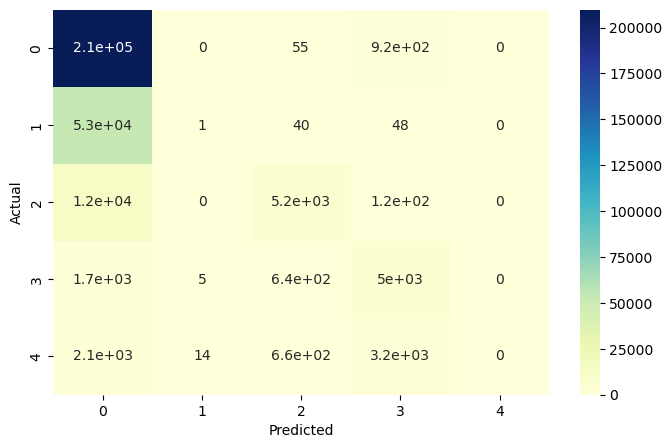

In [31]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,5))
print('Test Data \n',sns.heatmap(confusion_matrix(y_test,test_pred_lr),annot=True,cmap="YlGnBu"))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Scaling

In [32]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in x_train.columns:
    x_train[i] = sc.fit_transform(x_train[[i]])
    
for i in x_test.columns:
    x_test[i] = sc.fit_transform(x_test[[i]])


### Logistic Regression

In [33]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [39]:
test_pred_lr = lr.predict(x_test)
train_pred_lr = lr.predict(x_train)

from sklearn.metrics import classification_report,cohen_kappa_score
print('cohen_kappa_score :',cohen_kappa_score(y_test, test_pred_lr),'\n')
print('Train Data ','\n',classification_report(y_train,train_pred_lr))
print('Test Data','\n',classification_report(y_test,test_pred_lr))

cohen_kappa_score : 0.504419802665191 

Train Data  
               precision    recall  f1-score   support

           0       0.81      0.99      0.89    491566
           1       0.76      0.12      0.20    124382
           2       0.99      0.99      0.99     41110
           3       0.67      0.79      0.73     17133
           4       0.63      0.47      0.54     13902

    accuracy                           0.82    688093
   macro avg       0.78      0.67      0.67    688093
weighted avg       0.81      0.82      0.76    688093

Test Data 
               precision    recall  f1-score   support

           0       0.81      0.99      0.89    210671
           1       0.77      0.11      0.20     53306
           2       0.99      0.99      0.99     17619
           3       0.67      0.80      0.73      7343
           4       0.63      0.48      0.54      5958

    accuracy                           0.82    294897
   macro avg       0.78      0.67      0.67    294897
weighted av

Test Data 
 Axes(0.125,0.11;0.62x0.77)


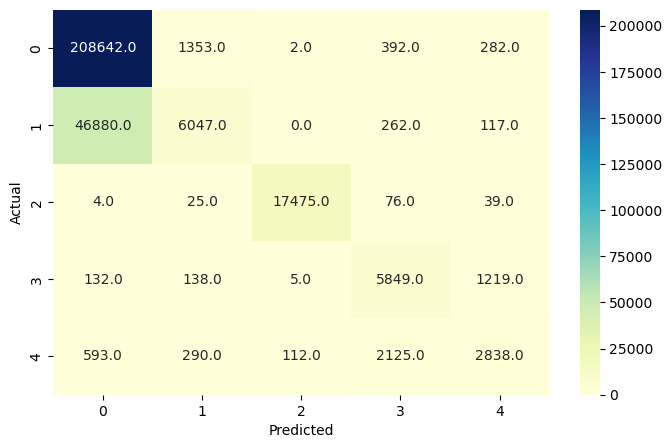

In [35]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,5))
print('Test Data \n',sns.heatmap(confusion_matrix(y_test,test_pred_lr),annot=True,cmap="YlGnBu",fmt='.1f'))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Random Forest

In [36]:
rf = RandomForestClassifier(random_state=1,max_depth=10)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=1)

In [40]:
test_pred_rf= rf.predict(x_test)
train_pred_rf = rf.predict(x_train)

print('cohen_kappa_score :',cohen_kappa_score(y_test, test_pred_rf),'\n')

from sklearn.metrics import classification_report
print('Train Data ','\n',classification_report(y_train,train_pred_rf))
print('Test Data','\n',classification_report(y_test,test_pred_rf))

cohen_kappa_score : 0.9231530783762508 

Train Data  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    491566
           1       1.00      1.00      1.00    124382
           2       1.00      1.00      1.00     41110
           3       0.90      0.95      0.93     17133
           4       0.93      0.87      0.90     13902

    accuracy                           1.00    688093
   macro avg       0.97      0.96      0.96    688093
weighted avg       1.00      1.00      1.00    688093

Test Data 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    210671
           1       0.92      1.00      0.96     53306
           2       1.00      1.00      1.00     17619
           3       0.75      0.41      0.53      7343
           4       0.53      0.82      0.64      5958

    accuracy                           0.96    294897
   macro avg       0.84      0.84      0.82    294897
weighted a

Test Data 
 Axes(0.125,0.11;0.62x0.77)


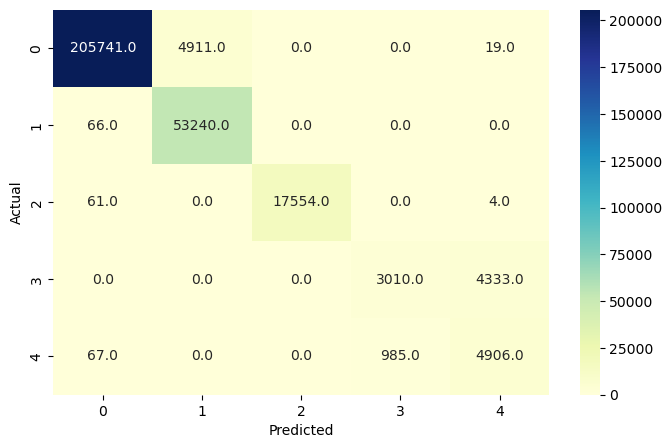

In [41]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,5))
print('Test Data \n',sns.heatmap(confusion_matrix(y_test,test_pred_rf),annot=True,cmap="YlGnBu",fmt='.1f'))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Gradient Boosting

In [43]:
gb = GradientBoostingClassifier(random_state=1)
gb.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

In [44]:
test_pred_gb= gb.predict(x_test)
train_pred_gb = gb.predict(x_train)

kappa = print('cohen_kappa_score :',cohen_kappa_score(y_test, test_pred_gb),'\n')

from sklearn.metrics import classification_report
print('Train Data ','\n',classification_report(y_train,train_pred_gb))
print('Test Data','\n',classification_report(y_test,test_pred_gb))

cohen_kappa_score : 0.9235877851091737 

Train Data  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    491566
           1       1.00      1.00      1.00    124382
           2       1.00      1.00      1.00     41110
           3       0.92      0.94      0.93     17133
           4       0.92      0.90      0.91     13902

    accuracy                           1.00    688093
   macro avg       0.97      0.97      0.97    688093
weighted avg       1.00      1.00      1.00    688093

Test Data 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    210671
           1       0.92      1.00      0.96     53306
           2       1.00      1.00      1.00     17619
           3       0.72      0.43      0.54      7343
           4       0.53      0.78      0.63      5958

    accuracy                           0.96    294897
   macro avg       0.83      0.84      0.82    294897
weighted a

Test Data 
 Axes(0.125,0.11;0.62x0.77)


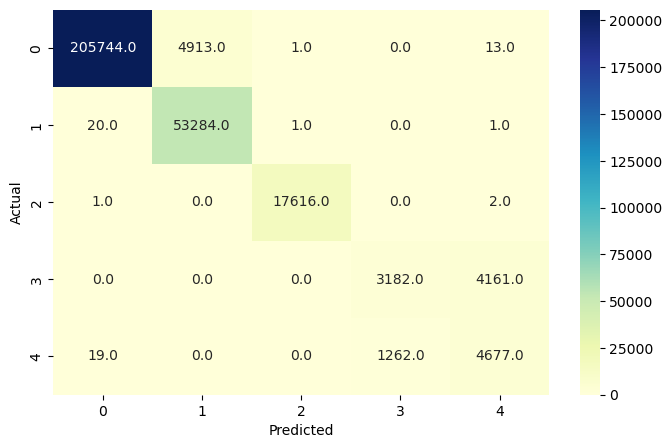

In [45]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,5))
print('Test Data \n',sns.heatmap(confusion_matrix(y_test,test_pred_gb),annot=True,cmap="YlGnBu",fmt='.1f'))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Extreme Gradient Boosting

In [46]:
xgb = GradientBoostingClassifier(random_state=1)
xgb.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

In [47]:
test_pred_xgb= xgb.predict(x_test)
train_pred_xgb = xgb.predict(x_train)

kappa = print('cohen_kappa_score :',cohen_kappa_score(y_test, test_pred_xgb),'\n')

from sklearn.metrics import classification_report
print('Train Data ','\n',classification_report(y_train,train_pred_xgb))
print('Test Data','\n',classification_report(y_test,test_pred_xgb))

cohen_kappa_score : 0.9235877851091737 

Train Data  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    491566
           1       1.00      1.00      1.00    124382
           2       1.00      1.00      1.00     41110
           3       0.92      0.94      0.93     17133
           4       0.92      0.90      0.91     13902

    accuracy                           1.00    688093
   macro avg       0.97      0.97      0.97    688093
weighted avg       1.00      1.00      1.00    688093

Test Data 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    210671
           1       0.92      1.00      0.96     53306
           2       1.00      1.00      1.00     17619
           3       0.72      0.43      0.54      7343
           4       0.53      0.78      0.63      5958

    accuracy                           0.96    294897
   macro avg       0.83      0.84      0.82    294897
weighted a

Test Data 
 Axes(0.125,0.11;0.62x0.77)


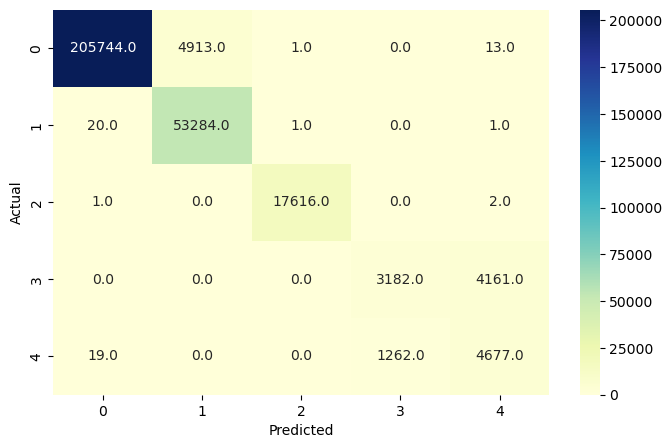

In [48]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,5))
print('Test Data \n',sns.heatmap(confusion_matrix(y_test,test_pred_xgb),annot=True,cmap="YlGnBu",fmt='.1f'))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Now we will perform relevant tests to check if the independent variables are associated with the target variable label_category

###### The base model we've trained appears to have very high accuracy and Cohen's Kappa value, which suggests strong model performance. Here's a breakdown of the results:

- Accuracy: The model achieves an accuracy of approximately 96%. This indicates that the majority of instances are correctly classified. However, it's important to consider the class distribution in your dataset. If some classes are highly imbalanced, accuracy alone may not provide a complete picture of the model's performance.

- Cohen's Kappa: The Kappa value of approximately 0.989 suggests almost perfect agreement between the predicted and actual labels, beyond what would be expected by random chance. This is an excellent result and indicates that the model is performing very well.

- Classification Report: The classification report provides detailed metrics for each class. Here are some key observations:

-For most classes (DoS, Mirai, Benign, Other), the precision, recall, and F1-score are very high, close to 1.0. This indicates that the model is effectively identifying these classes.
-The "DDoS" class has slightly lower precision (0.91) and recall (0.96), resulting in an F1-score of 0.93. This suggests that the model is still performing well but may have some room for improvement in distinguishing DDoS attacks.
-The "Recon" class has a lower F1-score (0.81) due to lower recall (0.75). This class might be more challenging for the model to correctly identify.

- Overall, the model seems to perform exceptionally well.

- Depending on the consequences of false positives and false negatives for each class, we might want to fine-tune the model's thresholds or explore techniques for improving class-specific performance, such as re-sampling techniques for imbalanced classes or adjusting class weights during training.

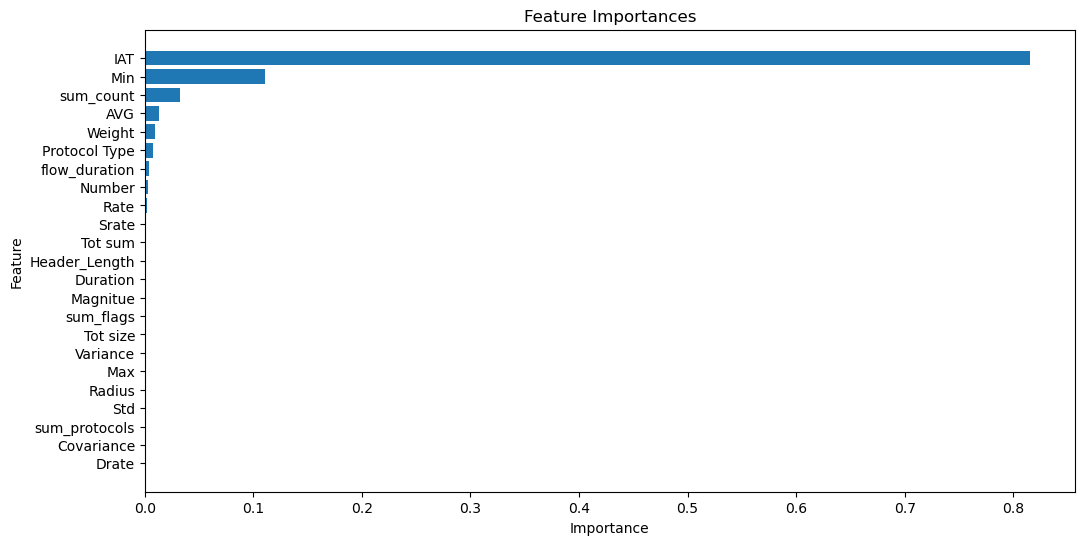

Top 10 most important features:
          Feature  Importance
6           Drate    0.000000
17     Covariance    0.000012
22  sum_protocols    0.000014
11            Std    0.000017
16         Radius    0.000021
9             Max    0.000053
18       Variance    0.000054
12       Tot size    0.000076
20      sum_flags    0.000171
15       Magnitue    0.000333


In [54]:
import matplotlib.pyplot as plt

# Getting feature importances from the trained Random Forest model
feature_importances = xgb.feature_importances_

# Creating a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': data.drop(['label_category'], axis=1).columns, 'Importance': feature_importances})

# Sorting the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Ploting the feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


top_n = 10 
top_features = feature_importance_df.head(top_n)
print(f'Top {top_n} most important features:')
print(top_features)


Interpretation: 

- We've successfully identified the top 10 most important features based on the feature importances from the Random Forest model. 
- These features have the highest impact on the model's predictions.
- Understanding these significant variables we provide valuable insights into the factors driving the detection of IoT intrusions.